# Bank Authentication Data Analysis 

We'll use the Bank Authentication Data Set. Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

The data consists of 5 columns:

* variance of Wavelet Transformed image (continuous)
* skewness of Wavelet Transformed image (continuous)
* curtosis of Wavelet Transformed image (continuous)
* entropy of image (continuous)
* class (integer)

Where class indicates whether or not a Bank Note was authentic.

This sort of task is perfectly suited for Neural Networks and Deep Learning.

## Get the Data

**Use pandas to read in the** `bank_note_data.csv` **file.**

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("mk029-project_bank_authentication_data_analysis_with_tensorflow/bank_note_data.csv")

**Check the head of the Data.**

In [3]:
df.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


## Exploratory Data Analysis

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(palette="bright")

**Create a** `countplot` **of the Classes (Authentic 1 vs Fake 0).**

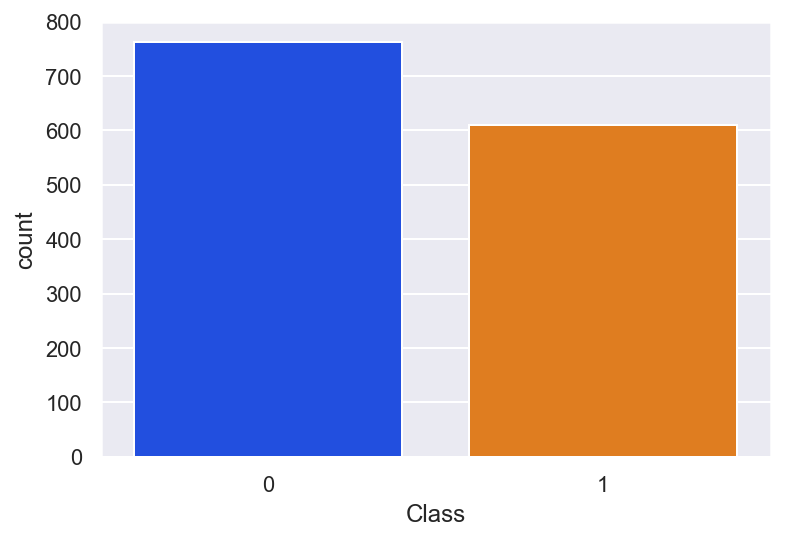

In [5]:
sns.countplot(x="Class", 
              data=df)

**Create a** `pairplot` **and set** `hue="Class"`.

C:\Users\MK\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\MK\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


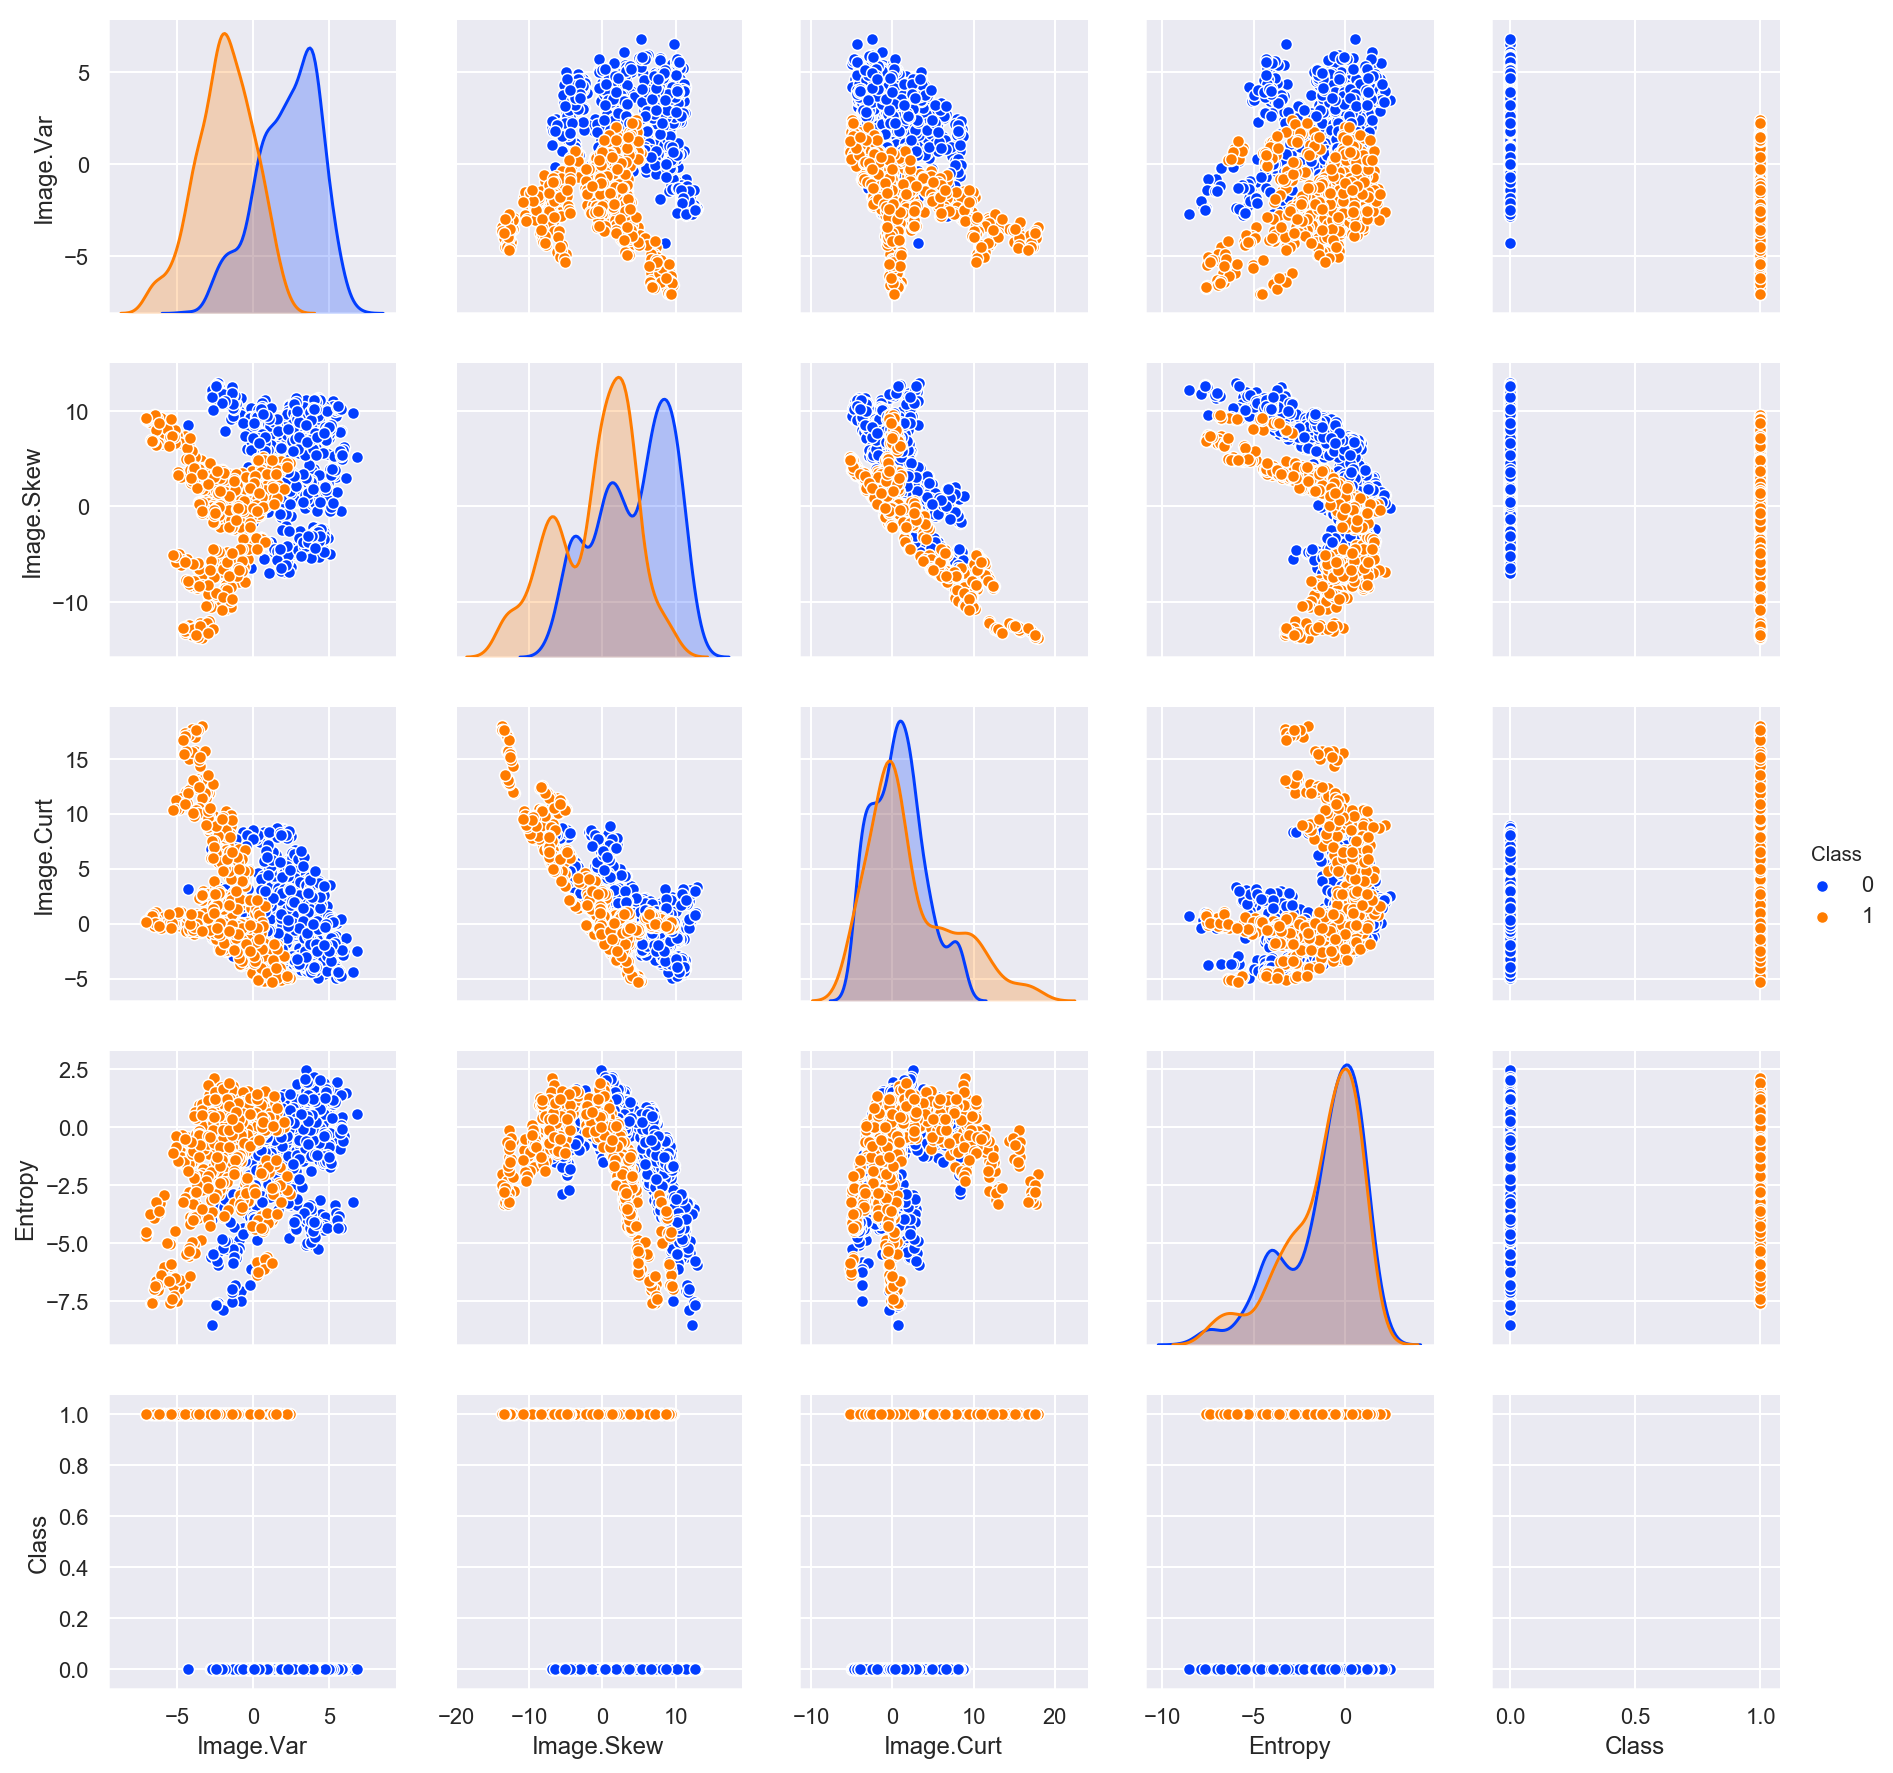

In [6]:
sns.pairplot(df, hue="Class", 
             diag_kind="kde")

## Data Preparation 

When using Neural Network and Deep Learning based systems, it is usually a good idea to Standardize the data.

### Standard Scaling

In [7]:
from sklearn.preprocessing import StandardScaler

**Create a** `StandardScaler()` **object instance.**

In [8]:
ss = StandardScaler()

**Fit** `ss` **to the features.**

In [9]:
ss.fit(df.drop(["Class"], 
               axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

**Use the** `transform()` **method to transform the features to a scaled version.**

In [10]:
scaled_features = ss.transform(df.drop(["Class"], 
                                       axis=1))
type(scaled_features)

numpy.ndarray

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [11]:
sdf = pd.DataFrame(scaled_features, 
                   columns=df.columns[:-1])
sdf.head()

,Image.Var,Image.Skew,Image.Curt,Entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587


## Train Test Split

**Create two objects X and y which are the scaled feature values and labels respectively.**

In [12]:
X = sdf
y = df["Class"]

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3)

# Tensorflow

In [15]:
import tensorflow as tf

**Create a list of feature column objects using** `tf.feature.numeric_column()`.

In [16]:
feat_cols = []
[feat_cols.append(tf.feature_column.numeric_column(col)) for col in X.columns]
feat_cols

[NumericColumn(key='Image.Var', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Image.Skew', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Image.Curt', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Entropy', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

**Create an object called** `classifier` **which is an instance of** `DNNClassifier` **. Set it to have 2 classes and a [10, 20, 10] hidden unit layer structure:**

In [17]:
classifier = tf.estimator.DNNClassifier(hidden_units=[10, 20, 10], 
                                        n_classes=2, 
                                        feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\MK\\AppData\\Local\\Temp\\tmp9sigt3bo', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000244EC6B50B8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


**Create a** `tf.estimator.pandas_input_fn` **that takes in your** `X_train`, `y_train`, `batch_size` **and set** `shuffle=True`. 

In [18]:
tr_input_func = tf.estimator.inputs.pandas_input_fn(x=X_train, 
                                                    y=y_train, 
                                                    batch_size=20, 
                                                    shuffle=True)

**Train** `classifier` **to the input function. Use** `steps=500`.

In [19]:
classifier.train(input_fn=tr_input_func, 
                 steps=500)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\MK\AppData\Local\Temp\tmp9sigt3bo\model.ckpt.
INFO:tensorflow:loss = 13.996148, step = 1
INFO:tensorflow:Saving checkpoints for 48 into C:\Users\MK\AppData\Local\Temp\tmp9sigt3bo\model.ckpt.
INFO:tensorflow:Loss for final step: 1.0425867.


## Model Evaluation

**Create another** `pandas_input_func` **that takes in the** `X_test` **data for x. Set** `shuffle=False` **since we don't need to shuffle for predictions.**

In [20]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, 
                                                      batch_size=len(X_test), 
                                                      shuffle=False)

**Use the** `predict` **method from the** `classifier` **model to create predictions from** `X_test`.

In [21]:
predictions = list(classifier.predict(input_fn=pred_input_func))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from C:\Users\MK\AppData\Local\Temp\tmp9sigt3bo\model.ckpt-48
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [22]:
predictions[:1]

[{'logits': array([3.6592653], dtype=float32),
  'logistic': array([0.97489506], dtype=float32),
  'probabilities': array([0.02510494, 0.974895  ], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object)}]

In [23]:
final_predictions = []
[final_predictions.append(p["class_ids"][0]) for p in predictions]
final_predictions[:5]

[1, 0, 1, 1, 1]

**Create a** `classification_report` **and a** `confusion_matrix`.

In [24]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [25]:
print(classification_report(y_test, final_predictions))
print(confusion_matrix(y_test, final_predictions))
print(accuracy_score(y_test, final_predictions))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       227
           1       0.95      0.99      0.97       185

   micro avg       0.97      0.97      0.97       412
   macro avg       0.97      0.97      0.97       412
weighted avg       0.97      0.97      0.97       412

[[218   9]
 [  2 183]]
0.9733009708737864


## Optional Comparison

We have extremely accurate results from the DNN model. Let's compare this to a Random Forest Classifier for a reality check!

**Use SciKit-Learn to create a** `RandomForestClassifier` **and compare the** `classification_report` **and** `confusion_matrix` **to the DNN model.**

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
rfc = RandomForestClassifier(n_estimators=200)

In [28]:
rfc.fit(X_train, 
        y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [29]:
rfc_pred = rfc.predict(X_test)

In [30]:
print(classification_report(y_test, rfc_pred))
print(confusion_matrix(y_test, rfc_pred))
print(accuracy_score(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       227
           1       0.99      0.99      0.99       185

   micro avg       0.99      0.99      0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412

[[225   2]
 [  1 184]]
0.9927184466019418


Random forest model performed well also. So we have confirmed the DNN model works.